In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [2]:
data = pd.read_csv("features_2.csv")

In [3]:
data.head() 


,label,f1,f2,f3,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5
0,4,-1,-8,0.094820,0,0,-2,0,1,0,-5,-2,0,-1
1,0,0,105,0.056174,0,0,0,0,0,69,0,0,36,0
2,3,-14,-5,0.151473,0,-6,-4,-2,-2,0,0,-3,-1,-1
3,4,-1,-2,0.056013,0,0,-1,0,0,-1,0,-1,0,0
4,1,24,-3,0.074469,8,0,8,8,0,-2,0,-1,0,0


In [4]:
data=data.iloc[:,0:4]

In [5]:
data.head() 

,label,f1,f2,f3
0,4,-1,-8,0.094820
1,0,0,105,0.056174
2,3,-14,-5,0.151473
3,4,-1,-2,0.056013
4,1,24,-3,0.074469


In [6]:
y = data['label']

In [7]:
X = data.ix[:, 'f1':]

/home/dl/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [8]:
X.head()

,f1,f2,f3
0,-1,-8,0.094820
1,0,105,0.056174
2,-14,-5,0.151473
3,-1,-2,0.056013
4,24,-3,0.074469


In [9]:
X -= np.mean(X, axis = 0)   #getting the mean and reduce with the mean 

In [10]:
X /= np.std(X, axis = 0) #device each feature column with it's standard deviation 

In [11]:
X.head()  #This in normalized data 

,f1,f2,f3
0,-0.260169,-0.312214,-0.704888
1,-0.226408,1.114511,-0.917678
2,-0.699057,-0.274336,-0.392949
3,-0.260169,-0.236458,-0.918564
4,0.583846,-0.249084,-0.816944


In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
threedee = plt.figure().gca(projection='3d')

In [14]:
df=X

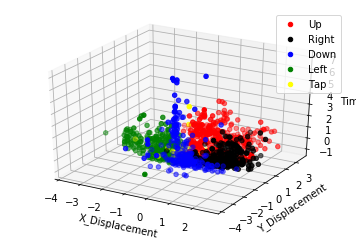

In [15]:
threedee.scatter(df[y==0]['f1'], df[y==0]['f2'], df[y==0]['f3'],label='Up', c='red')
threedee.scatter(df[y==1]['f1'], df[y==1]['f2'], df[y==1]['f3'],label='Right', c='black')
threedee.scatter(df[y==2]['f1'], df[y==2]['f2'], df[y==2]['f3'],label='Down', c='blue')
threedee.scatter(df[y==3]['f1'], df[y==3]['f2'], df[y==3]['f3'],label='Left', c='green')
threedee.scatter(df[y==4]['f1'], df[y==4]['f2'], df[y==4]['f3'],label='Tap', c='yellow')

threedee.set_xlabel('X_Displacement')
threedee.set_ylabel('Y_Displacement')
threedee.set_zlabel('Time')
plt.legend()
plt.show()